In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [33]:
#Data Extraction
File = ['1993.csv','2000.csv','2005.csv','2006.csv','2007.csv','2008.csv']
File_location= "/Users/zee/Desktop/Big Data project/"
Extension = '_new.csv'
Airline_delay = pd.DataFrame()

for Filename in File:
    Import_data = File_location + Filename       # Fetching the data of the years
    data = pd.read_csv(Import_data)              # Loading the data into the platform
    random = data.sample(1000,random_state=42)   # random selection of data 1000 records from each year
    
    save_file = File_location + Filename + Extension 
    random.to_csv(save_file)
    
    Airline_delay = pd.concat([Airline_delay,random])   #combining the loaded data with years
    Airline_delay.to_csv(r'/Users/zee/Desktop/Big Data project/Airline_delay3.csv',index=False)

In [67]:
  Airline_delay.to_csv(r'/Users/zee/Desktop/Big Data project/Airline_delay3.csv',index=False)

In [8]:
Airline_delay.shape  #After combining the data

(6000, 29)

In [36]:
Airline_delay

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delays
4209789,1993,10,7,4,730.0,730,1124.0,1119,CO,352,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Y
2377031,1993,6,25,5,1430.0,1430,1523.0,1531,DL,1837,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,N
120245,1993,1,19,2,2043.0,2045,2319.0,2339,NW,894,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,N
4854736,1993,12,16,4,1224.0,1225,1329.0,1333,US,81,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,N
4115444,1993,10,1,5,1644.0,1645,1902.0,1836,NW,107,...,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234588,2008,1,8,2,1014.0,1013,1319.0,1323,UA,550,...,11.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Y
1675188,2008,3,4,2,1815.0,1810,2221.0,2140,AA,812,...,36.0,0,0,0,0.0,0.0,41.0,0.0,0.0,Y
2007786,2008,4,5,6,2008.0,2000,2234.0,2220,UA,117,...,22.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Y
2176206,2008,4,22,2,1456.0,1500,1621.0,1620,MQ,3541,...,21.0,0,0,0,0.0,0.0,0.0,0.0,0.0,Y


In [35]:
#Adding the Delay column into the combined table
Airline_delay.loc[(Airline_delay['ArrDelay']>0.0) | (Airline_delay['DepDelay']>=0.0),'Delays'] = 'Y'
Airline_delay.loc[(Airline_delay['ArrDelay']<=0.0) & (Airline_delay['DepDelay']<=0.0),'Delays'] = 'N'

#Missing values in the dataset
Airline_delay.isna().sum()  

#Replacing the missing values with Zero             
Airline_delay.fillna(value=0,inplace=True)  
                  

In [64]:
Airline_delay['Delays'].value_counts()
#Airline_delay.drop[Airline_delay['Delays']==0]
Airline_delay = Airline_delay[Airline_delay.Delays != 0]


In [65]:
Airline_delay['Delays'].value_counts()

Y    3379
N    2484
Name: Delays, dtype: int64

In [66]:
Airline_delay.isna().sum()  

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Delays               0
dtype: int64

In [12]:
Airline_delay.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Delays'],
      dtype='object')

In [65]:
Airline_delay.to_csv(r'/Users/zee/Desktop/Big Data project/Airline2_delay.csv',index=False)

In [13]:
Airline_delay.isna().sum()  #Missing values in the dataset

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Delays               0
dtype: int64

In [58]:
Airline_delay.fillna(value=0,inplace=True)   #Replacing the missing values with Zero

In [167]:
Airline_delay.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
Delays               0
dtype: int64

In [72]:
Airline_delay['Delays'].value_counts()

Y    3447
N    2553
Name: Delays, dtype: int64

In [68]:
Airline_delay.corr()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Year,1.000000,-0.174597,0.003928,-0.022186,-0.009690,-0.013505,-0.004668,-0.000821,0.295815,0.083512,...,0.051673,0.120047,0.441022,NaN,-0.002746,0.105339,0.050277,0.131163,0.016343,0.129985
Month,-0.174597,1.000000,0.015963,-0.007315,-0.007655,-0.003280,-0.006047,-0.008120,-0.044668,-0.030401,...,-0.027437,-0.016138,-0.024871,NaN,0.007766,-0.031551,0.004080,-0.021136,-0.004746,-0.047197
DayofMonth,0.003928,0.015963,1.000000,-0.009878,0.020028,0.019770,0.025918,0.019015,0.011637,-0.000815,...,-0.004226,-0.017222,0.016849,NaN,-0.004560,0.001252,0.002286,0.028883,-0.007268,-0.002858
DayOfWeek,-0.022186,-0.007315,-0.009878,1.000000,-0.000204,-0.003127,0.012248,0.001830,-0.009605,0.015919,...,0.016584,-0.012678,-0.022616,NaN,0.006537,-0.009089,-0.005478,-0.003962,0.002358,0.009632
DepTime,-0.009690,-0.007655,0.020028,-0.000204,1.000000,0.980014,0.722373,0.802907,0.008340,-0.039853,...,-0.037987,0.015835,0.034785,NaN,0.016610,0.050061,0.032977,0.043453,0.015041,0.146471
CRSDepTime,-0.013505,-0.003280,0.019770,-0.003127,0.980014,1.000000,0.716389,0.800290,0.005444,-0.039005,...,-0.033614,0.015538,0.024555,NaN,0.007244,0.006581,0.050286,0.011063,0.011588,0.094337
ArrTime,-0.004668,-0.006047,0.025918,0.012248,0.722373,0.716389,1.000000,0.873010,-0.012432,0.041475,...,0.019729,0.025975,0.027761,NaN,-0.135240,0.011290,-0.026469,0.045635,0.019919,0.061803
CRSArrTime,-0.000821,-0.008120,0.019015,0.001830,0.802907,0.800290,0.873010,1.000000,-0.015531,0.052311,...,0.048859,0.023286,0.040111,NaN,0.003961,0.004980,0.052051,0.024398,0.016286,0.084661
FlightNum,0.295815,-0.044668,0.011637,-0.009605,0.008340,0.005444,-0.012432,-0.015531,1.000000,-0.234610,...,-0.270205,0.049709,0.115578,NaN,-0.003400,0.048739,0.087821,0.042349,-0.001081,0.029719
ActualElapsedTime,0.083512,-0.030401,-0.000815,0.015919,-0.039853,-0.039005,0.041475,0.052311,-0.234610,1.000000,...,0.954912,0.039710,0.271371,NaN,-0.081596,0.024306,0.012325,0.132357,0.022772,0.017436


<AxesSubplot:>

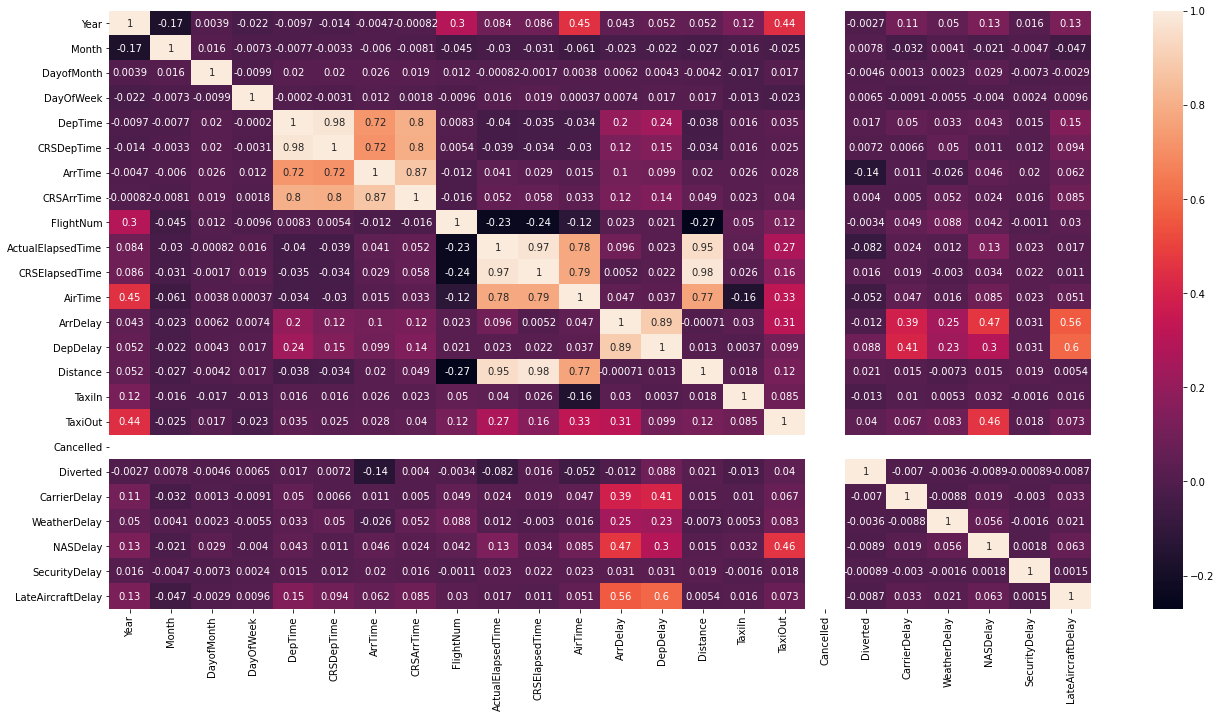

In [69]:
plt.figure(figsize=(22,11))
sns.heatmap(Airline_delay.corr(),annot=True) # Feature Selection

In [70]:
Airline_delay2 = Airline_delay.drop(['Year', 'Month', 'DayofMonth', 'DayOfWeek',  'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','ArrDelay','DepDelay'],axis=1)

In [71]:
Airline_delay2

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,Delays
4209789,730.0,730,1124.0,1119,174.0,169.0,0.0,Y
2377031,1430.0,1430,1523.0,1531,53.0,61.0,0.0,N
120245,2043.0,2045,2319.0,2339,156.0,174.0,0.0,N
4854736,1224.0,1225,1329.0,1333,125.0,128.0,0.0,N
4115444,1644.0,1645,1902.0,1836,198.0,171.0,0.0,Y
...,...,...,...,...,...,...,...,...
234588,1014.0,1013,1319.0,1323,125.0,130.0,107.0,Y
1675188,1815.0,1810,2221.0,2140,186.0,150.0,143.0,Y
2007786,2008.0,2000,2234.0,2220,266.0,260.0,241.0,Y
2176206,1456.0,1500,1621.0,1620,85.0,80.0,60.0,Y


In [72]:
#Training & Testing the data for model deployement
x=Airline_delay2.drop("Delays",axis=1)
y=Airline_delay2['Delays']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=100)

#Linear SVC
from sklearn import svm
from sklearn.svm import LinearSVC
clf = svm.LinearSVC()
clf.fit(x_train, y_train)
clf.predict(x_test)
clf.score(x_test,y_test)

#Cross-Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
for train_index ,test_index in kf.split([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]):
    print(train_index ,test_index)
    
def get_score(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)
    get_score(clf,x_train,y_train,x_test,y_test)


[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [0 1]
[ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [2 3]
[ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17] [4 5]
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17] [6 7]
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 17] [8 9]
[ 0  1  2  3  4  5  6  7  8  9 12 13 14 15 16 17] [10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 14 15 16 17] [12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 17] [14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17] [16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17]


/Users/zee/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [76]:
from sklearn.svm import LinearSVC
clf = svm.LinearSVC()
clf.fit(x_train, y_train)
clf.predict(x_test)
clf.score(x_test,y_test)


/Users/zee/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.4440022740193292

In [77]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [78]:
for train_index ,test_index in kf.split([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]):
    print(train_index ,test_index)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [0 1]
[ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [2 3]
[ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17] [4 5]
[ 0  1  2  3  4  5  8  9 10 11 12 13 14 15 16 17] [6 7]
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 17] [8 9]
[ 0  1  2  3  4  5  6  7  8  9 12 13 14 15 16 17] [10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 14 15 16 17] [12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 17] [14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17] [16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17]


In [31]:
def get_score(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [82]:
get_score(clf,x_train,y_train,x_test,y_test)*100

/Users/zee/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


57.41898806139852

In [34]:
Airline_delay.loc[['ArrDelay']>0.0] 

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime               127
CRSDepTime              0
ArrTime               141
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum              2000
ActualElapsedTime     141
CRSElapsedTime          0
AirTime              2116
ArrDelay              141
DepDelay              127
Origin                  0
Dest                    0
Distance                4
TaxiIn               2000
TaxiOut              2000
Cancelled               0
CancellationCode     5927
Diverted                0
CarrierDelay         3000
WeatherDelay         3000
NASDelay             3000
SecurityDelay        3000
LateAircraftDelay    3000
dtype: int64

In [31]:
Airline_delay

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4209789,1993,10,7,4,730.0,730,1124.0,1119,CO,352,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2377031,1993,6,25,5,1430.0,1430,1523.0,1531,DL,1837,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
120245,1993,1,19,2,2043.0,2045,2319.0,2339,NW,894,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4854736,1993,12,16,4,1224.0,1225,1329.0,1333,US,81,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4115444,1993,10,1,5,1644.0,1645,1902.0,1836,NW,107,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731280,2007,7,10,2,744.0,740,836.0,825,WN,2653,...,5.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1950791,2007,4,27,5,1604.0,1335,1835.0,1535,XE,2807,...,8.0,51.0,0,NaN,0,0.0,0.0,180.0,0.0,0.0
420454,2007,1,27,6,657.0,700,833.0,835,MQ,4431,...,25.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4737383,2007,8,9,4,1242.0,1246,2034.0,2030,FL,16,...,13.0,21.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
